In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from tqdm import tqdm

In [26]:
#(a)
def x_n(A, f, n, sigma):
    return A * np.sin(2 * np.pi * f * n) + np.random.normal(0, sigma, len(n))

def compute_crlb(A, sigma, N, f):
    return (12 * sigma**2) / (A**2 * N**2 * (np.sin(2 * np.pi * f))**2)

def cost_function(f, A, n, measurements):
    return np.sum((measurements - A * np.sin(2 * np.pi * f * n))**2)

In [27]:
A = 1
sigma = 1
N_values = [100, 200, 300]
num_experiments = 100
f_values = np.linspace(0.01, 0.49, 100)

experiments = {}

for N in N_values:
    for f_true in tqdm(f_values):
        f_estimates = []
        for _ in range(num_experiments):
            n = np.arange(1, N + 1)
            measurements = x_n(A, f_true, n, sigma)
            f_init = np.random.uniform(0, 0.5)
            f_ml = fmin(cost_function, f_init, args=(A, n, measurements), disp=False)
            f_estimates.append(f_ml[0])
        
        experiments[(N, f_true)] = f_estimates


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.82it/s]


In [28]:
sample_variances = {}

for key, f_estimates in experiments.items():
    N, f_true = key
    var = np.var(f_estimates)
    sample_variances[key] = var

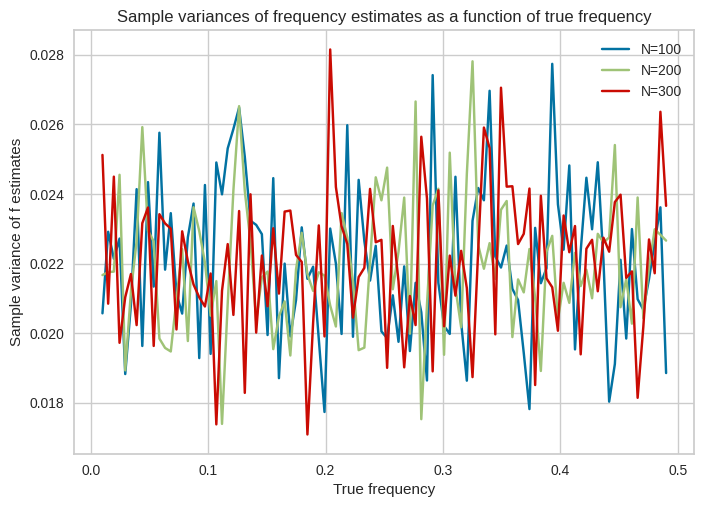

In [29]:
def plot_sample_variances(sample_variances, N_values, f_values):
    plt.figure()
    for N in N_values:
        variances = [sample_variances[(N, f_true)] for f_true in f_values]
        plt.plot(f_values, variances, label=f'N={N}')
    
    plt.xlabel('True frequency')
    plt.ylabel('Sample variance of f estimates')
    plt.legend()
    plt.title('Sample variances of frequency estimates as a function of true frequency')
    plt.show()

plot_sample_variances(sample_variances, N_values, f_values)

In [30]:
def compute_crlb(A, sigma, N, f):
    return (12 * sigma**2) / (A**2 * N**2 * (np.sin(2 * np.pi * f))**2)

In [31]:
ml_errors = {}

for key, f_estimates in experiments.items():
    N, f_true = key
    error_squared = [(f_est - f_true)**2 for f_est in f_estimates]
    ml_errors[key] = error_squared

In [32]:
mean_ml_errors = {}
crlb_values = {}

for key, errors in ml_errors.items():
    N, f_true = key
    mean_error = np.mean(errors)
    mean_ml_errors[key] = mean_error
    
    sigma = 1
    crlb = compute_crlb(A, sigma, N, f_true)
    crlb_values[key] = crlb

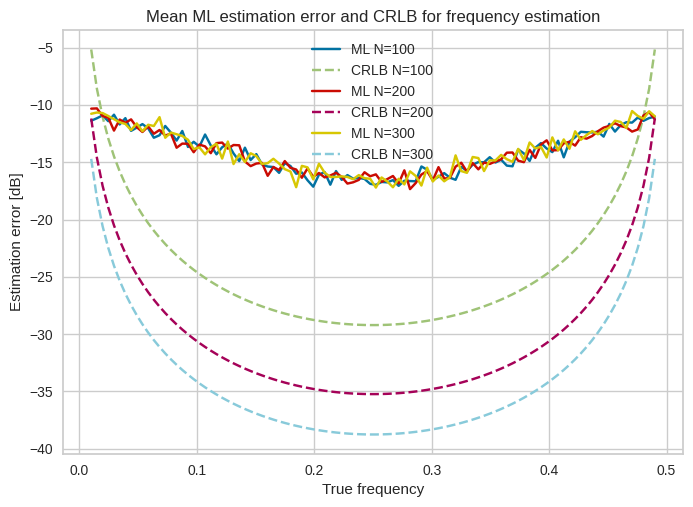

In [33]:
def plot_ml_errors_crlb(mean_ml_errors, crlb_values, N_values, f_values):
    plt.figure()
    for N in N_values:
        ml_errors = [mean_ml_errors[(N, f_true)] for f_true in f_values]
        crlb = [crlb_values[(N, f_true)] for f_true in f_values]
        
        plt.plot(f_values, 10 * np.log10(ml_errors), label=f'ML N={N}')
        plt.plot(f_values, 10 * np.log10(crlb), '--', label=f'CRLB N={N}')
    
    plt.xlabel('True frequency')
    plt.ylabel('Estimation error [dB]')
    plt.legend()
    plt.title('Mean ML estimation error and CRLB for frequency estimation')
    plt.show()

plot_ml_errors_crlb(mean_ml_errors, crlb_values, N_values, f_values)